<img src="logo-catedra.png" width="400"> <img src="Logo-GIIATa-small.png" width="100"> 
<div style="text-align: right"> _Por: V. Robles B._ </div>

# Redes Neuronales con Scikit-Learn: una introducción - Parte 1

En este cuaderno se presenta una breve introducción de los principales aspectos para crear, entrenar y validar redes neuronales artificiales en Python con la librería [scikit-learn](http://scikit-learn.org/stable/index.html). A lo largo del cuaderno se hará especial énfasis en el **Perceptrón multicapa** como herramienta para realizar tareas de clasificación.

Como primer punto, es importante verificar que tengamos todos las librerías instaladas. 

## Prerrequisitos:

A fin de poder ejecutar las instrucciones de este cuaderno, debemos verificar que tengamos instaladas las siguientes librerías:

* Python (versiones >=2.7 o >=3.3)
* [Numpy >= 1.8.2](http://www.numpy.org/)
* [SciPy >= 0.13.3](https://www.scipy.org/)

## Instalación:
La instalación de **scikit-learn** se puede realizar de manera sencilla a través del siguiente comando:

    pip install -U scikit-learn
    
Donde la opción **-U** indica que si existe el paquete, deberá actualizarse a la última versión estable existente.

De igual forma, si se desean mayores detalles, es factible consultar el siguiente [enlace](http://scikit-learn.org/stable/install.html).

## Ejemplo básico 1: compuerta XOR
Como se conoce, el perceptrón simple (de una sola neurona y una sola capa) no es capaz de resolver problemas que no sean separables linealmente.

Por ello, en esta sección aprenderemos cómo resolver un el sencillo problema de la compuerta XOR (que no es separable linealmente). Comencemos!

### Corpus
Para entrenar la red, debemos tener claro en primer lugar, cuáles son las entradas y salidas que nuestra red neuronal deberá aprender. En la siguiente tabla se puede apreciar los patrones de entrada (donde cada patrón está conformado por dos entradas $x_{1}$ y $x_{2}$), y las correspondientes etiquetas o salidas ($\delta$).


| $x_{1}$| $x_{2}$| $\delta$  |
| ------------- |-------------| -----|
| 0|0 |0|
| 0|1 |1|
| 1|0 |1|
| 1|1 |0|

A continuación visualizamos los patrones que se desea que aprenda nuestra red:



[[0 0]
 [0 1]
 [1 0]
 [1 1]]


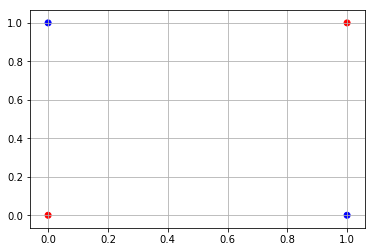

In [1]:
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline

x=np.array([[0,0],[0,1],[1,0],[1,1]])
d=np.array([0,1,1,0])

print(x)

pp.scatter(x[:,0],x[:,1],color=['blue' if i==1 else 'red' for i in d])

pp.grid(True)
pp.show()

Como se puede apreciar, no es posible separar con una sola línea los puntos azules (que indican que la red debería devolver un valor de $1$ en esos casos) de los puntos rojos.

Por ello, ahora vamos a crear una red multicapa que tendrá la siguiente estructura:

* Número de entradas = 2
* Total de capas = 2
* Neuronas en la capa oculta = 4
* Salidas = 1

Si deseamos visualizar la **estructura** de nuestra red neuronal, podemos emplear el paquete [viznet](http://viznet.readthedocs.io/en/latest/tutorials.html). Es importante observar que en **THE ASIMOV INSTITUTE** existe una completa descripción gráfica de la estructura de los diferentes tipos de redes neuronales: [The Neural Network Zoo](http://www.asimovinstitute.org/neural-network-zoo/) [3].

In [2]:
from viznet import connecta2a, node_sequence, NodeBrush, EdgeBrush, DynamicShow

# Creamos variables con los parametros que tendra la red
entradas = 2
neuronas_capa_oculta = 4
neuronas_capa_salida = 1


def dibujar_red_neuronal(ax, num_node_list):

    num_hidden_layer = len(num_node_list) - 2
    token_list = ['\sigma^z'] + \
        ['y^{(%s)}' % (i + 1) for i in range(num_hidden_layer)] + ['\psi']
    kind_list = ['nn.input'] + ['nn.hidden'] * num_hidden_layer + ['nn.output']
    radius_list = [0.3] + [0.2] * num_hidden_layer + [0.3]
    y_list = 1.5 * np.arange(len(num_node_list))

    seq_list = []
    for n, kind, radius, y in zip(num_node_list, kind_list, radius_list, y_list):
        b = NodeBrush(kind, ax)
        seq_list.append(node_sequence(b, n, center=(0, y)))

    eb = EdgeBrush('-->', ax)
    for st, et in zip(seq_list[:-1], seq_list[1:]):
        connecta2a(st, et, eb)


def real_bp():
    with DynamicShow((6, 6), '_feed_forward.png') as d:
        dibujar_red_neuronal(d.ax, num_node_list=[entradas, neuronas_capa_oculta, neuronas_capa_salida])


real_bp()

SyntaxError: only named arguments may follow *expression (brush.py, line 384)

A continuación emplearemos **sckikit learn** para crear, entrenar y probar la red neuronal [MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) que se especificó con anterioridad. Los parámetros que se usarán son los siguientes:

* Algoritmo para la reducción del error en el entrenamiento: **lbfgs** optimizador basado en métodos cuasi-Newtonianos. Mayor información en este [link](https://en.wikipedia.org/wiki/Limited-memory_BFGS).
* Función de activación de las neuronas: **logística** (_logistic_)
* Máximo número de iteraciones (*max_iter*): 10000


In [3]:
# Importamos el Perceptron Multicapa para Clasificacion
from sklearn.neural_network import MLPClassifier

# Creamos variables con los parametros que tendra la red
entradas = 2
neuronas_capa_oculta = 4
neuronas_capa_salida = 1

# Creamos la red neuronal
mlp=MLPClassifier(solver = 'lbfgs', activation='logistic', verbose=True, alpha=1e-4, tol=1e-15, max_iter=10000, \
                  hidden_layer_sizes=(neuronas_capa_oculta, neuronas_capa_salida))

print(mlp)
# Realizamos el proceso de entrenamiento
mlp.fit(x,d)

# Mostramos los pesos entre la entrada y la capa oculta
print('Pesos W^(0): \n:',mlp.coefs_[0])

# Mostramos los pesos entre la capa oculta y la capa de salida
print('\nPesos W^(1): \n:',mlp.coefs_[1])

# Probamos si la red devuelve valores apropiados de acuerdo a las entradas (test):
for entrada in x:
    print('\nPrueba con {','|'.join([str(i) for i in entrada]),'} => ',mlp.predict(entrada.reshape(1,-1)))

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4, 1), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=1e-15, validation_fraction=0.1,
       verbose=True, warm_start=False)
Pesos W^(0): 
: [[  4.40043640e+00   4.30316129e-03  -3.90679033e-03   4.39814499e+00]
 [ -4.40363607e+00   6.66980554e-03   1.90572475e-04  -4.40372914e+00]]

Pesos W^(1): 
: [[  7.17110215e+00]
 [ -5.47759765e-03]
 [ -1.93572758e-04]
 [ -7.17166047e+00]]

Prueba con { 0|0 } =>  [0]

Prueba con { 0|1 } =>  [1]

Prueba con { 1|0 } =>  [1]

Prueba con { 1|1 } =>  [0]


### Práctica ANN-0:

Modifique el código anterior, a fin de usar [Hot Encoding](https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science) y contar con 2 salidas en lugar de 1.

In [4]:
# Importamos el Perceptron Multicapa para Clasificacion
from sklearn.neural_network import MLPClassifier

# TODO:
# Modificar las salidas deseadas para representarlas con 2 valores binarios
neuronas_capa_salida = 2

# Modoficar los parametros de la Red Neuronal. Sustituir None por el valor correspondiente
mlp=MLPClassifier(solver = 'lbfgs', activation='logistic', alpha=1e-4, tol=1e-15, max_iter=10000, \
                  hidden_layer_sizes=(neuronas_capa_oculta, neuronas_capa_salida))

print(mlp)
# Realizamos el proceso de entrenamiento con la nueva representacion de la salida. 
# Sustituir None por el valor correspondiente:

# TODO:

mlp.fit(x,d)

# Mostramos los pesos entre la entrada y la capa oculta
print('Pesos W^(0): \n:',mlp.coefs_[0])

# Mostramos los pesos entre la capa oculta y la capa de salida
print('\nPesos W^(1): \n:',mlp.coefs_[1])

# Probamos si la red devuelve valores apropiados de acuerdo a las entradas (test):
for entrada in x:
    print('\nPrueba con {','|'.join([str(i) for i in entrada]),'} => ',mlp.predict(entrada.reshape(1,-1)))

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=1e-15, validation_fraction=0.1,
       verbose=False, warm_start=False)
Pesos W^(0): 
: [[  3.18270944e-03   2.53860668e-03  -4.40426920e+00  -4.39901937e+00]
 [ -7.43927046e-03   1.73675695e-02  -4.40428867e+00  -4.39650363e+00]]

Pesos W^(1): 
: [[  2.12425204e-02  -1.51427893e-03]
 [  4.57118751e-03   3.66782717e-04]
 [ -7.17043977e+00   7.89197815e-03]
 [  7.17389433e+00   7.23297989e-03]]

Prueba con { 0|0 } =>  [0]

Prueba con { 0|1 } =>  [1]

Prueba con { 1|0 } =>  [1]

Prueba con { 1|1 } =>  [0]


### Práctica ANN-1:

Genere 1000 puntos aleatorios con coordenadas $(x_{1}, x_{2})$. Con estos puntos, deberá realizar las siguientes tareas:

* Seleccionar de forma aleatoria 80% de los puntos para entrenar la red y el restante 20% se empleará para probar la red.
* Entrenar la red hasta lograr un error mínimo.
* Probar la red y presentar la matriz de [confusión](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).
* Indicar el nivel de [precisión](https://en.wikipedia.org/wiki/Precision_and_recall) (muestras correctamente clasificadas frente al total de muestras):

$precision=\frac{muestras ~~correctamente ~~clasificadas}{total~~ de~~ muestras}$

Genere 1000 puntos aleatorios con coordenadas $(x_{1}, x_{2})$.

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as pp
import random

n = 1000
coor = [] #Coordenas
d = [1 if i % 2 == 0 else 0 for i in range(0, n)]
for i in range(0, n):
    coor.append([random.random() * 100, random.random() * 100])

datos = np.array(coor)

X_train, X_test, d_train, d_test = train_test_split(datos,d,train_size=0.70,random_state=0,stratify=d)

# Creamos la red neuronal
mlp=MLPClassifier(solver = 'lbfgs', activation='logistic', verbose=True, alpha=1e-4, tol=1e-15, max_iter=10000, \
                  hidden_layer_sizes=(150,2))

mlp.fit(datos, d)
print(mlp)
# Realizamos el proceso de entrenamiento
mlp.fit(X_train,d_train)

prediccion = mlp.predict(x_test)
print('Matriz de Confusion\n')
matriz = confusion_matrix(d_test, prediccion)
print(confusion_matrix(d_test, prediccion))
print('\n')
print(classification_report(d_test, prediccion))






MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=1e-15, validation_fraction=0.1,
       verbose=True, warm_start=False)
Matriz de Confusion

[[94 56]
 [86 64]]


             precision    recall  f1-score   support

          0       0.52      0.63      0.57       150
          1       0.53      0.43      0.47       150

avg / total       0.53      0.53      0.52       300



## Referencias
[1] Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Vanderplas, J. (2011). Scikit-learn: Machine learning in Python. Journal of machine learning research, 12(Oct), 2825-2830.

[2] Portilla, J. (2017). A Beginner’s Guide to Neural Networks in Python and SciKit Learn 0.18. Retrieved from https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/.

[3] The Asimov Institute. (2018). THE NEURAL NETWORK ZOO. Retrived from: http://www.asimovinstitute.org/neural-network-zoo/